# HEALTHCARE REVIEWS 

In this project we will be ANALYZING the sentiments in Healthcare review
The objective here is to classify sentiments
The Tasks are :
1. Data Preprocessing
2. Sentimental Analysis
3. Model Evaluation
4. Data visualisation

In [ ]:
#Import all the library files

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
#Read the csv file

In [2]:
df = pd.read_csv("D:\\DATA SCIENCE ARJUN\\DS project\\healthcare_reviews.csv")


In [3]:
df

,Review_Text,Rating
0,I have mixed feelings about my experience.,4
1,The staff was caring and attentive. I couldn't...,5
2,I have mixed feelings about my experience.,5
3,I have mixed feelings about my experience.,5
4,The healthcare provider was excellent. I had a...,3
...,...,...
995,My experience was terrible. I would not recomm...,5
996,The service was disappointing. I won't be comi...,4
997,"The service was okay, but nothing exceptional.",3
998,I have mixed feelings about my experience.,5


In [4]:
df.head(10)

,Review_Text,Rating
0,I have mixed feelings about my experience.,4
1,The staff was caring and attentive. I couldn't...,5
2,I have mixed feelings about my experience.,5
3,I have mixed feelings about my experience.,5
4,The healthcare provider was excellent. I had a...,3
5,The staff was caring and attentive. I couldn't...,4
6,NaN,2
7,I had a bad experience with this healthcare pr...,2
8,I have mixed feelings about my experience.,3
9,I have mixed feelings about my experience.,5


In [7]:
# Split the dataset into training and testing sets
X = df['Review_Text']
y = df['Rating']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
df.head()

,Review_Text,Rating
0,I have mixed feelings about my experience.,4
1,The staff was caring and attentive. I couldn't...,5
2,I have mixed feelings about my experience.,5
3,I have mixed feelings about my experience.,5
4,The healthcare provider was excellent. I had a...,3


In [19]:
# Handling missing values by replacing them with empty strings
X_train.fillna('', inplace=True)
X_test.fillna('', inplace=True)


In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Text vectorization (using TF-IDF for feature extraction)
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)


In [15]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

# Train a Naive Bayes classifier
naive_bayes = MultinomialNB()
naive_bayes.fit(X_train_tfidf, y_train)

# Predict sentiments on the test data
y_pred = naive_bayes.predict(X_test_tfidf)

# Model evaluation
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(classification_report(y_test, y_pred))


Accuracy: 0.215
              precision    recall  f1-score   support

           1       0.17      0.14      0.15        37
           2       0.16      0.20      0.18        40
           3       0.18      0.17      0.18        35
           4       0.24      0.42      0.30        38
           5       0.38      0.16      0.23        50

    accuracy                           0.21       200
   macro avg       0.23      0.22      0.21       200
weighted avg       0.24      0.21      0.21       200



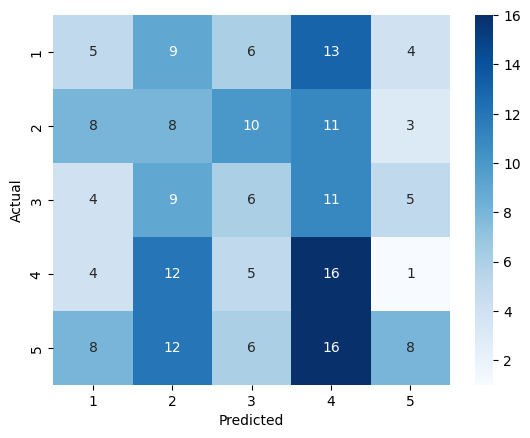

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap="Blues")
plt.show()
